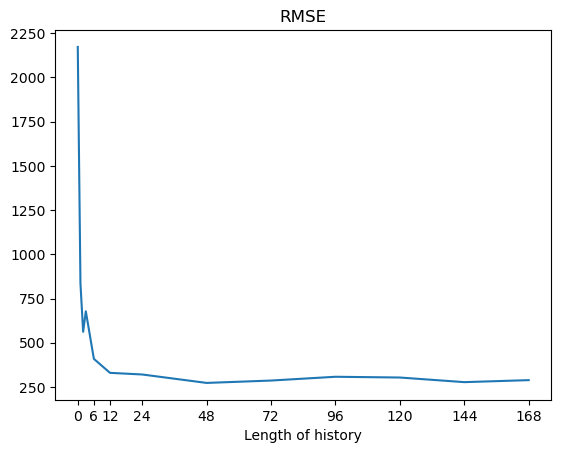

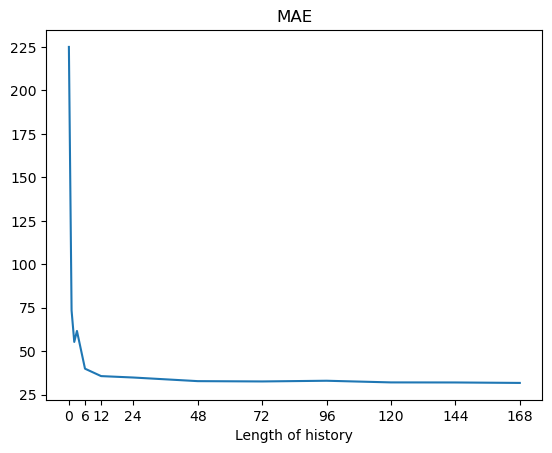

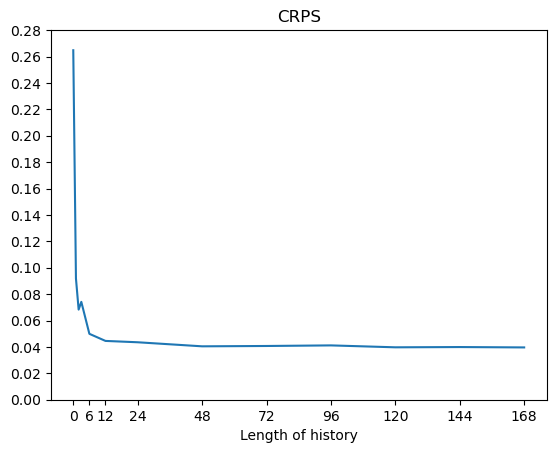

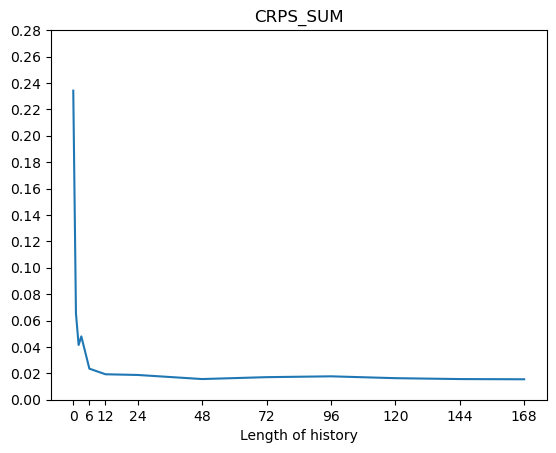

In [15]:
import pathlib
import matplotlib.pyplot as plt

hist_dict = {}
for path in pathlib.Path('save/hist_len_expr').rglob('*.txt'):
    hist_len = int((str(path.parent).split('/')[-1].split('_')[1]))
    with open(path) as f:
        lines = f.readlines()
        hist_dict[hist_len] = {}
        hist_dict[hist_len]['rmse'] = round(float(lines[0].split()[-1]),6)
        hist_dict[hist_len]['mae'] = round(float(lines[1].split()[-1]),6)
        hist_dict[hist_len]['crps'] = round(float(lines[2].split()[-1]),6)
        hist_dict[hist_len]['crps_sum'] = round(float(lines[3].split()[-1]),6)

len_accmlr = []
rmse_accmlr = []
mae_accmlr = []
crps_accmlr = []
crps_sum_accmlr = []
for k,v in sorted(hist_dict.items(), key=lambda x: int(x[0])):
    len_accmlr.append(k)
    rmse_accmlr.append(v['rmse'])
    mae_accmlr.append(v['mae'])
    crps_accmlr.append(v['crps'])
    crps_sum_accmlr.append(v['crps_sum'])

fig, axs = plt.subplots()
axs.plot(len_accmlr, rmse_accmlr, label='RMSE')
axs.set_title('RMSE')
axs.set_xlabel('Length of history')
axs.set_xticks([len_accmlr[0]]+len_accmlr[4:])
plt.show()

fig, axs = plt.subplots()
axs.plot(len_accmlr, mae_accmlr, label='MAE')
axs.set_title('MAE')
axs.set_xlabel('Length of history')
axs.set_xticks([len_accmlr[0]]+len_accmlr[4:])
plt.show()

fig, axs = plt.subplots()
axs.plot(len_accmlr, crps_accmlr, label='CRPS')
axs.set_title('CRPS')
axs.set_xlabel('Length of history')
axs.set_xticks([len_accmlr[0]]+len_accmlr[4:])
axs.set_yticks([i/50 for i in range(15)])
plt.show()

fig, axs = plt.subplots()
axs.plot(len_accmlr, crps_sum_accmlr, label='CRPS_SUM')
axs.set_title('CRPS_SUM')
axs.set_xlabel('Length of history')
axs.set_xticks([len_accmlr[0]]+len_accmlr[4:])
axs.set_yticks([i/50 for i in range(15)])
plt.show()